In [ ]:
# png, jpg, gif,
# 이미지를 구성하는 가장 작은 단위 => pixel (pixel이 모여서 이미지 형태가 형성된다.)

# 이미지는 좌표계를 조금 다르게 사용한다.
#

In [11]:
# 코드로 이미지를 핸들링 해 보아요!
# 일반적으로 이미지 처리(픽셀처리)를 쉽게하기 위해
# library를 이용해요!

import numpy as np
from PIL import Image  # Pillow library가 있어요!
# pillow module은 기본 module이 아니기 떄문에 다른 환경에서 사용할떄는 먼저 module설치한 후 사용해야 한다. => pip installpillow
import matplotlib.pyplot as plt

img = Image.open('/content/my_justice.jpg')

print(type(img))  #<class 'PIL.JpegImagePlugin.JpegImageFile'>

# 이렇게 불러들인 image를 화면에 출력
# plt.imshow(img)
# plt.show()

pixel = np.array(img)
print(pixel.shape) #(426, 640, 3)
# 이미지 데이터는 3차원
# 426 => 높이, 640 => 너비, 3 => 채널(RGB)

# 간단한 이미지 처리를 해 보아요!

# pillow를 이용하면 이런 이미지처리를 조금 쉽게 가져갈 수 있어요!
# 이미지 저장
img.save('my_justice.jpg')


# 이미지 잘라내기 (cropping) => 좌표값은 좌상, 우하
# crop_img = img.crop((30,100,150,330))
# plt.imshow(crop_img)
# plt.show()


# 이미지 크기 변경
# print(img.size)  # => (640, 426)
# resize_img = img.resize((int(img.size[0]/2), int(img.size[1]/2)))
# plt.imshow(resize_img)
# plt.show()

# 이미지 회전
# print(img.size)  # => (640, 426)
rotate_img = img.rotate(90)
plt.imshow(rotate_img)
plt.show()


FileNotFoundError: ignored

(426, 640, 3)


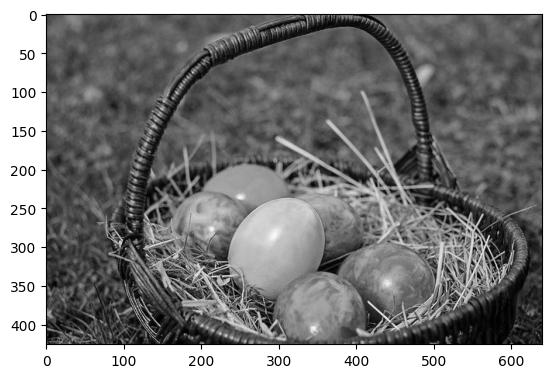

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

color_img = Image.open('/content/fruits.jpg')
# plt.imshow(color_img)
# plt.show()

# 이미지 객체의 pixel data를 추출해요!
color_pixel = np.array(color_img)
print(color_pixel.shape) # (426, 640, 3)

# 해당 컬러이미지를 흑백으로 바꿔보아요!
gray_pixel = color_pixel.copy()
# 각 픽셀의 값을 RGB컬러의 평균값으로 설정하면 흑백처리 되요!
# 각 pixel은 그안에 1차원 ndarray가 들어가 있어요..RGB값을 가지는 ndarray
for y in range(gray_pixel.shape[0]):
    for x in range(gray_pixel.shape[1]):
        gray_pixel[y,x] = int(np.mean(gray_pixel[y,x])) # scalar

# plt.imshow(gray_pixel)
# plt.show()

# 이렇게 이미지는 3차원으로 표현되고 컬러와 흑백 모두 3차원으로 표현되는게
# 정석.

# 약간 생각의 좀 달리해서.. 3차원으로 되어 있는 이미지 데이터를
# 흑백에 대해서는 2차원으로 표현 할 수 있어요!
gray_2d_pixel = gray_pixel[:,:,0]
# print(gray_2d_pixel.shape)
# print(gray_2d_pixel)

plt.imshow(gray_2d_pixel, cmap='gray')

In [12]:
# 이번에는 Multinomial Classification예를 하나 더 해 보아요!
# 다중 분류 문제인데.. 사용하는 데이터(학습데이터)가 이미지예요!
# 이미지를 학습해 보아요!

# 데이터셋이 있어야 해요!
# 이 데이터셋은 kaggle에서 가져올 꺼예요!
# train, test데이터를 이용해서 처리해 보아요!
# 제공된 train 데이터를 이용해서 학습하고 평가까지 같이 진행할꺼예요!
# 제공된 test데이터를 이용해서 우리 모델의 예측치를 뽑아내서 kaggle에 제출해 보아요!

# 사용되는 module import부터 해야 해요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Raw Data Loading
# df = pd.read_csv('/content/drive/MyDrive/[빅데이터 과정 공유폴더]/data/Fasion-mnist/fashion-mnist_train.csv')
df = pd.read_csv('/content/drive/MyDrive/[빅데이터 과정 공유폴더]/data/mnist/train.csv')
# display(df.head(), df.shape) #(42000, 785)

# 데이터 전처리과정을 진행
# 1. 결치값 확인 => 결치값이 없어요!
# 2. 이상치 확인 => 이상치도 없어요!
# 3. 정규화처리 => 정규화는 처리해야 할 거 같아요!
scaler = MinMaxScaler()
scaler.fit(df.drop('label', axis=1, inplace=False).values)

x_data_norm = scaler.transform(df.drop('label', axis=1, inplace=False).values)
# t_data는 0부터 9까지의 숫자로 표현되는 10개의 분류값(class)
# 2차원으로 표현해야 하고 실제 숫자값이 아닌 분류값이기 떄문에 정규화 필요없다.

t_data = df['label'].values.reshape(-1,1)

# 4. train , test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3)

In [13]:
# 5. Model 구현

model = Sequential()
model.add(Flatten(input_shape=(784,)))

model.add(Dense(units=64,
                activation='relu'))
model.add(Dense(units=128,
                activation='relu'))
model.add(Dense(units=256,
                activation='relu'))

model.add(Dense(units=10,
                activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_data_train_norm,
          t_data_train,
          epochs=100,
          verbose=1,
          validation_split=0.3)

Epoch 1/100
644/644 [==============================] - 5s 6ms/step - loss: 0.9633 - accuracy: 0.7463 - val_loss: 0.3853 - val_accuracy: 0.8967
Epoch 2/100
644/644 [==============================] - 3s 5ms/step - loss: 0.3359 - accuracy: 0.9025 - val_loss: 0.3051 - val_accuracy: 0.9152
Epoch 3/100
644/644 [==============================] - 3s 4ms/step - loss: 0.2668 - accuracy: 0.9208 - val_loss: 0.2638 - val_accuracy: 0.9247
Epoch 4/100
644/644 [==============================] - 3s 4ms/step - loss: 0.2272 - accuracy: 0.9349 - val_loss: 0.2372 - val_accuracy: 0.9311
Epoch 5/100
644/644 [==============================] - 3s 4ms/step - loss: 0.1998 - accuracy: 0.9417 - val_loss: 0.2186 - val_accuracy: 0.9365
Epoch 6/100
644/644 [==============================] - 4s 7ms/step - loss: 0.1772 - accuracy: 0.9486 - val_loss: 0.2100 - val_accuracy: 0.9388
Epoch 7/100
644/644 [==============================] - 3s 4ms/step - loss: 0.1599 - accuracy: 0.9543 - val_loss: 0.1973 - val_accuracy: 0.9416

In [14]:
# 모델 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))
# MNIST : [0.26954683661460876, 0.9214285612106323]
# Fashion MNIST : [0.4279690086841583, 0.8556666374206543]

# 아하 .. MNIST data set을 이용해서
# logistic regression을 이용한 머신러닝 Multinomial Classification을
# 수행한 결과 우리 모델은 0.921의 정확도를 가지는 모델로 만들 수 있어요!

# 약간 주의해야 할 점!!

# 결과만 놓고 보면..음..적당히 잘 나오는군..92%정도나오니까..조금 더 하면..
# 이미지 학습도 잘 되는것처럼 보여요!

# 그런데 사실 이 데이터는 너무 간단한 이미지예요!
# 간단한 이미지면서 이미지의 크기가 작기때문에 학습이 잘 되는것처럼 보이는거지
# 일반적으로 이미지 학습은 잘 되지 않아요!

# 이미지 학습이 잘 안되는 가장 큰 문제는 어디에 기인할까요?
# 원래 이미지는 3차원이예요(우리는 2차원으로 사용하고 있죠.)
# 머신러닝을 하기 위해 2차원 데이터를 1차원으로 변경해야 하고
# 공간데이터(공간정보)가 날라가요!




394/394 [==============================] - 1s 3ms/step - loss: 0.2969 - accuracy: 0.9622
[0.2969450354576111, 0.9622222185134888]


In [15]:
# XOR이라고 부르는 Logistic Regression을 이용해서 구현해 보아요!

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

x_data = np.array([[0,0], [0,1], [1,0], [1,1]])
t_data = np.array([0, 1, 1, 0]).reshape(-1,1)

model = Sequential()
# input layer
model.add(Flatten(input_shape=(2,)))

# hidden layer
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=64,
                activation='relu'))
model.add(Dense(units=128,
                activation='relu'))

# output layer
model.add(Dense(units=1,
                activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model.summary()
model.fit(x_data,
          t_data,
          epochs=1000,
          verbose=1)


Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6953 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6660 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6084 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5303 - accuracy: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.4346 - accuracy: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.3339 - accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2425 - accuracy: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.1749 - accuracy: 1.0000
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.1295 - accuracy: 1.0000
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0949 - accuracy: 1.0000
Epoch 11/10